In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as npcreate_product
import pandas as pd
import read_data
import datetime
import create_product
%matplotlib inline

In [2]:
data, timesteps = read_data.get_daily_data()

MAX_DATES_SHOWN = 15

In [3]:
tub = []
total_deaths = []
total_recovered = []
new_time_series = []
active_time_series = []
active2 = []
last_confirmed = 0
for i in timesteps:
    total = 0
    death = 0
    act = 0
    recovered = 0
    
    for c in data[i]["confirmed"]:
        total += c
    for c in data[i]["deaths"]:
        death += c
    for c in data[i]["recovered"]:
        recovered += c
    for c in data[i]["active"]:
        act += c
    
    new_time_series.append(total-last_confirmed)
    last_confirmed = total
    total_deaths.append(death)
    total_recovered.append(recovered)
    active_time_series.append(total - death - recovered)
    active2.append(act)
    tub.append(total)

In [4]:
tub
x_vals = [datetime.datetime.strptime(d,"%m-%d-%Y").date() for d in timesteps]

In [5]:
data[timesteps[0]]

,province,country,lat,lon,confirmed,deaths,recovered,active
0,Hubei,Mainland China,30.9756,112.2707,66907,2761,31536,32610
1,NaN,South Korea,36.0000,128.0000,3736,17,30,3689
2,NaN,Italy,43.0000,12.0000,1694,34,83,1577
3,Guangdong,Mainland China,23.3417,113.4244,1349,7,1016,326
4,Henan,Mainland China,33.8820,113.6140,1272,22,1198,52
...,...,...,...,...,...,...,...,...
120,"Tempe, AZ",US,33.4255,-111.9400,1,0,1,0
121,From Diamond Princess,Australia,35.4437,139.6380,0,0,0,0
122,"Lackland, TX (From Diamond Princess)",US,29.3829,-98.6134,0,0,0,0
123,"Omaha, NE (From Diamond Princess)",US,41.2545,-95.9758,0,0,0,0


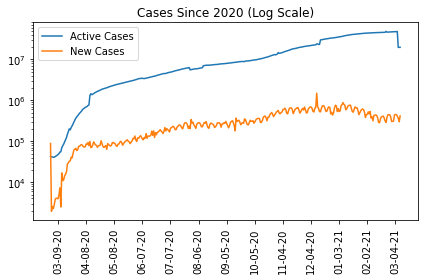

In [6]:
plt.figure()
ax = plt.gca()

formatter = mdates.DateFormatter("%m-%d-%y")
ax.xaxis.set_major_formatter(formatter)

locator = mdates.DayLocator()
ax.xaxis.set_major_locator(plt.MaxNLocator(MAX_DATES_SHOWN))
ax.set_yscale("log")
plt.xticks(rotation=90)

plt.title("Cases Since 2020 (Log Scale)")

#plt.plot(x_vals,total_deaths,label="Deaths")
#plt.plot(x_vals,active_time_series, label="Active Cases")
plt.plot(x_vals,active2, label="Active Cases")
plt.plot(x_vals,new_time_series, label="New Cases")
plt.legend()
plt.tight_layout()

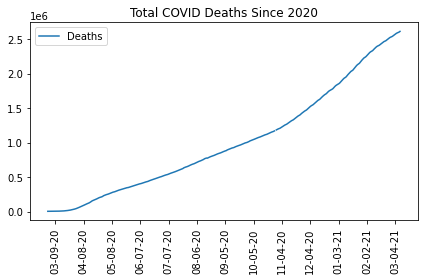

In [7]:
plt.figure()
ax = plt.gca()

formatter = mdates.DateFormatter("%m-%d-%y")
ax.xaxis.set_major_formatter(formatter)

locator = mdates.DayLocator()
ax.xaxis.set_major_locator(plt.MaxNLocator(MAX_DATES_SHOWN))
#ax.set_yscale("log")
plt.xticks(rotation=90)

plt.title("Total COVID Deaths Since 2020")

#plt.plot(x_vals,total_deaths,label="Deaths")
plt.plot(x_vals,total_deaths, label="Deaths")
plt.legend()
plt.tight_layout()

## Death Recovery and Active

In [3]:
us_data_deaths, usd_timesteps = read_data.get_covid_deaths_US()
us_data_confirmed, usc_timesteps = read_data.get_covid_confirmed_US()

In [4]:
county_deaths_series = {}
county_confirmed_series = {}
county_ratio_series = {}
for step in usd_timesteps:
    if step in usc_timesteps:
        county_confirmed_series[step] = us_data_confirmed[step]
        county_deaths_series[step] = us_data_deaths[step]
        county_ratio_series[step] = us_data_deaths[step]/us_data_confirmed[step]

#print(us_data_confirmed)

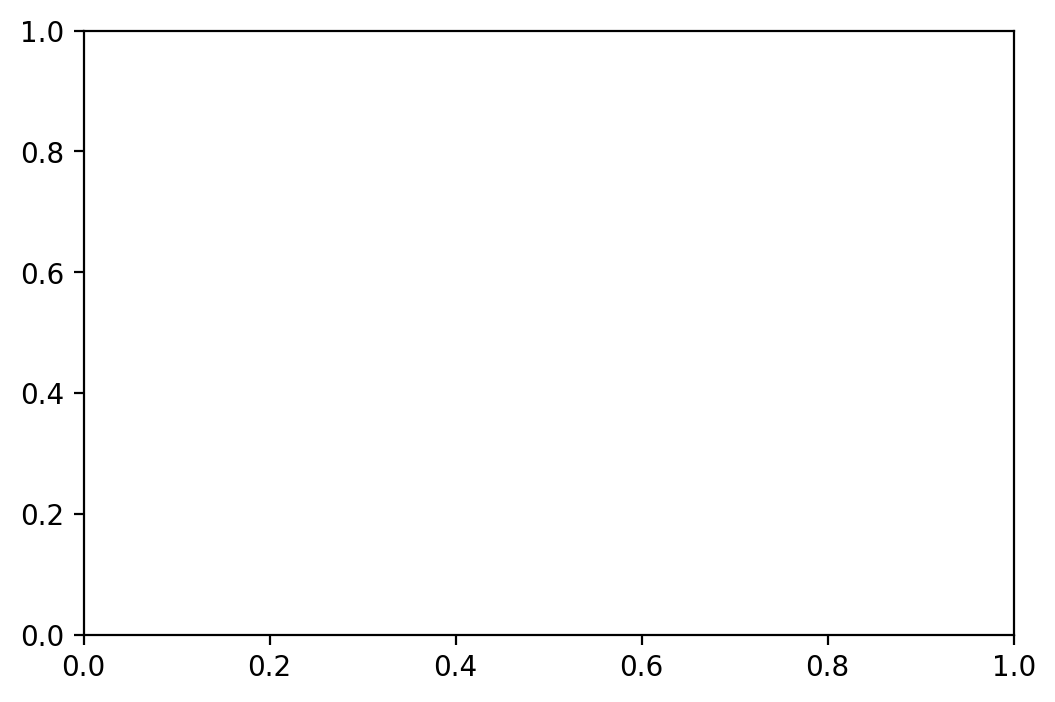

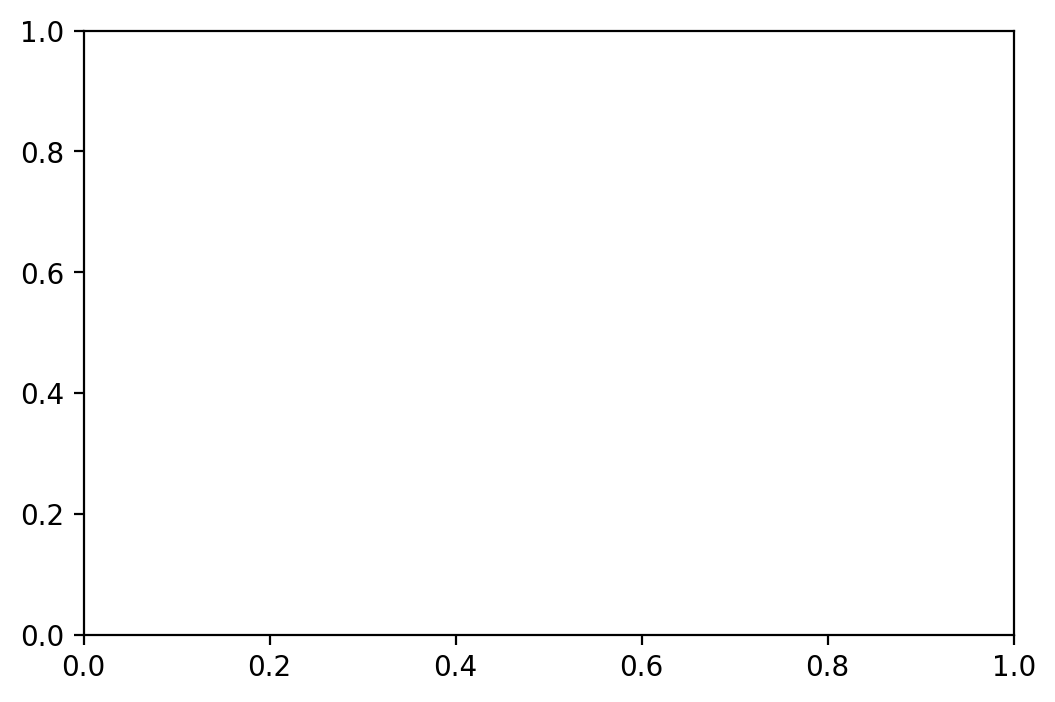

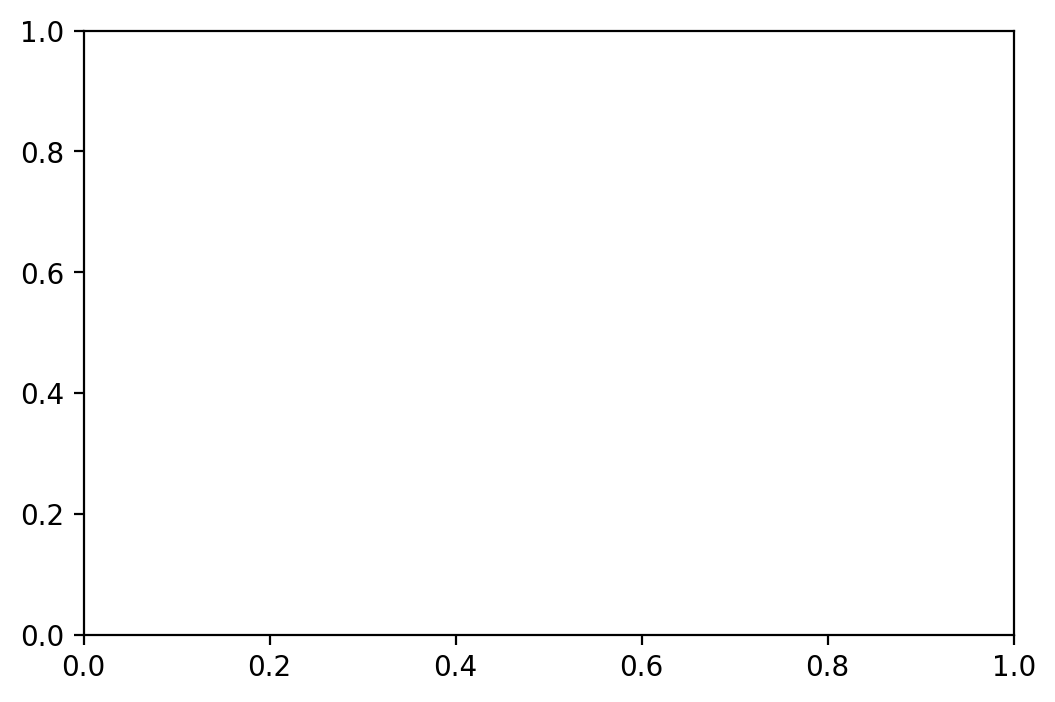

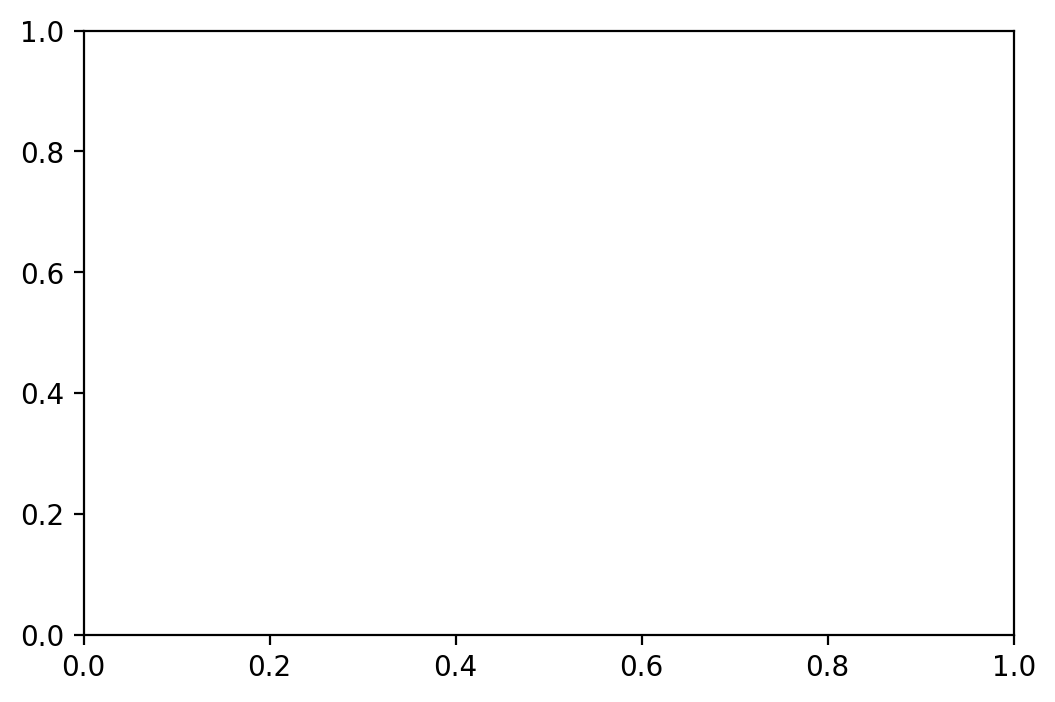

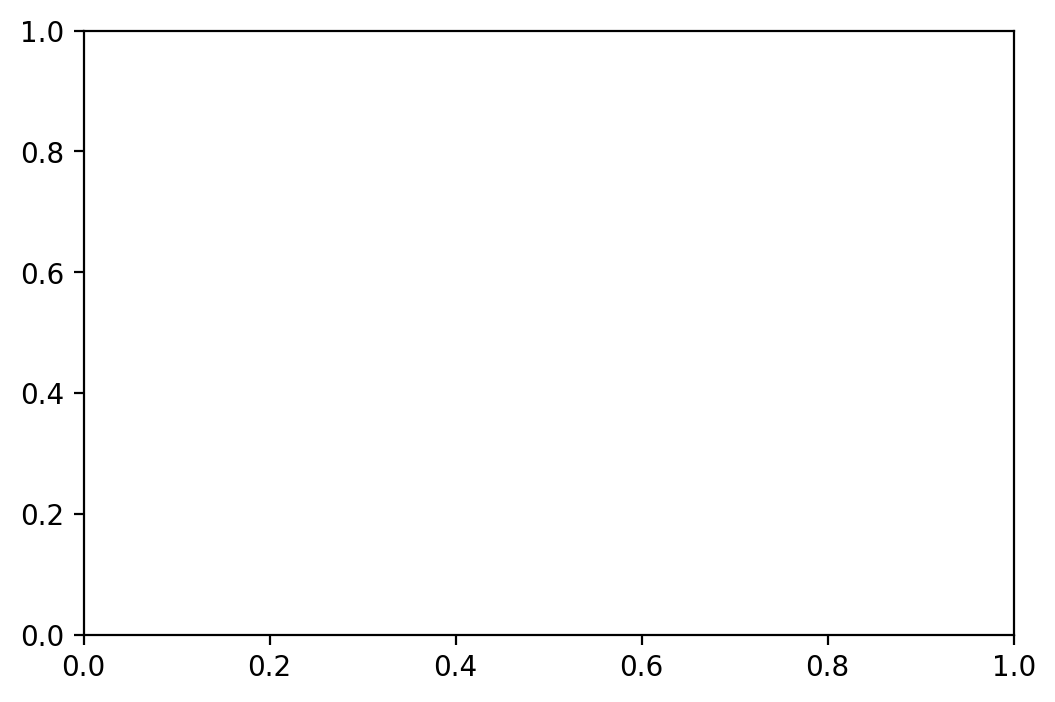

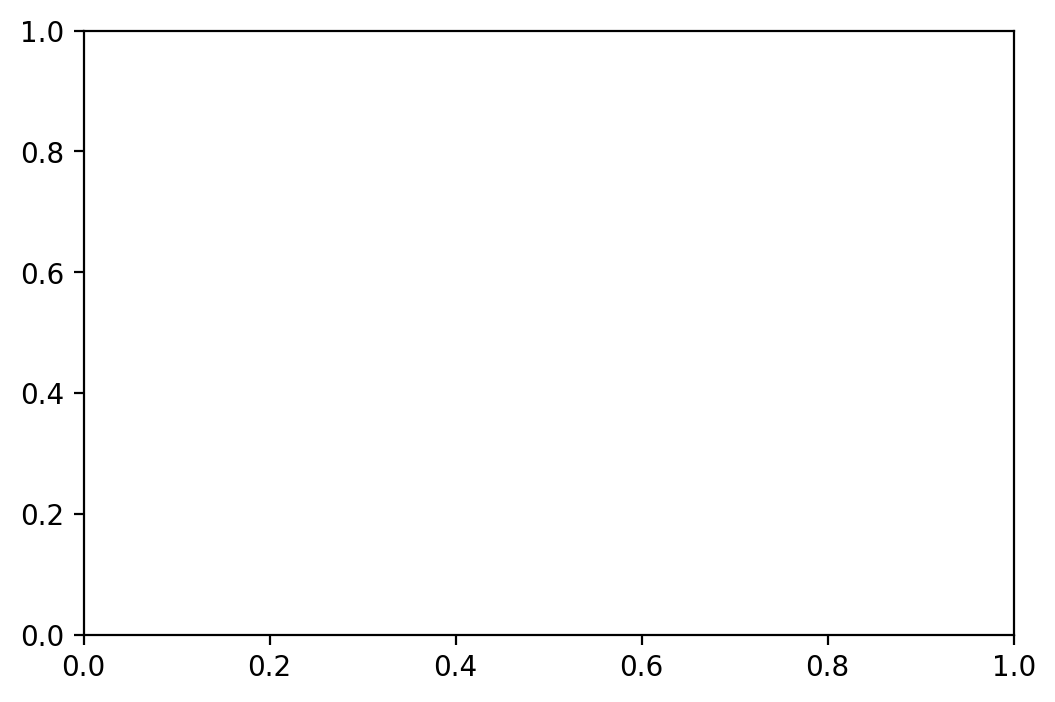

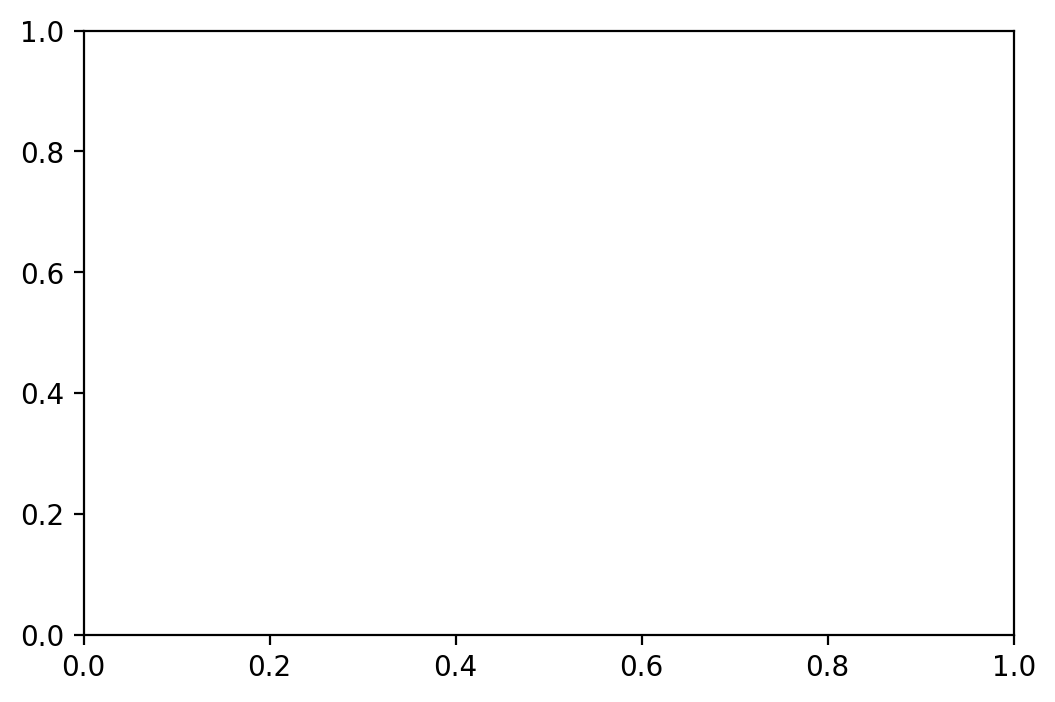

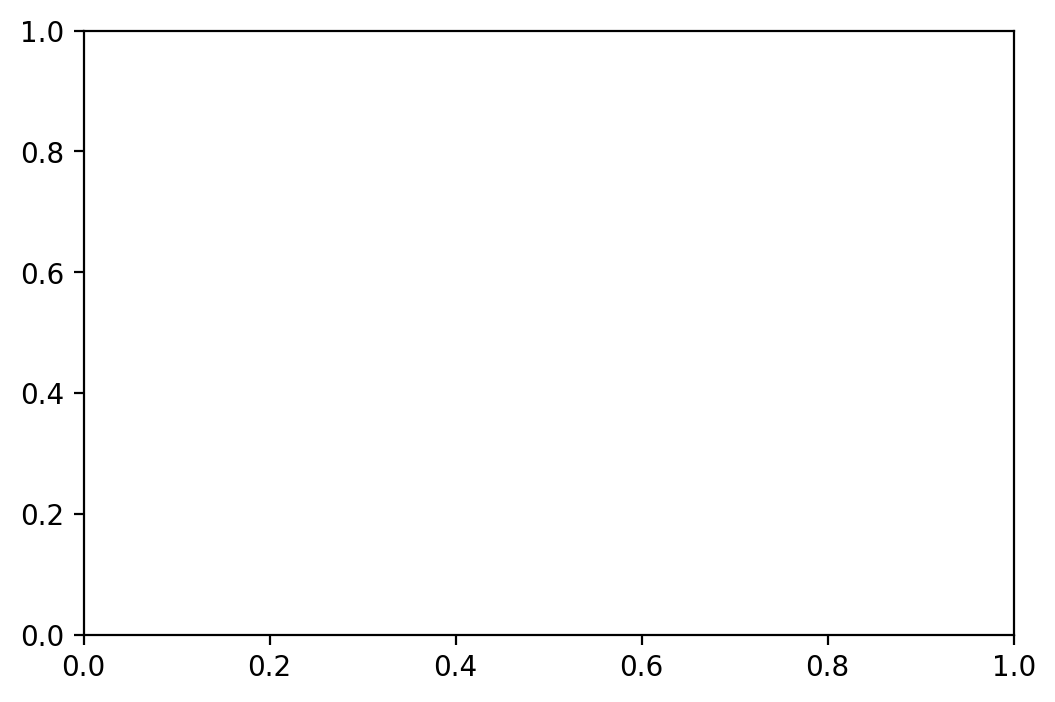

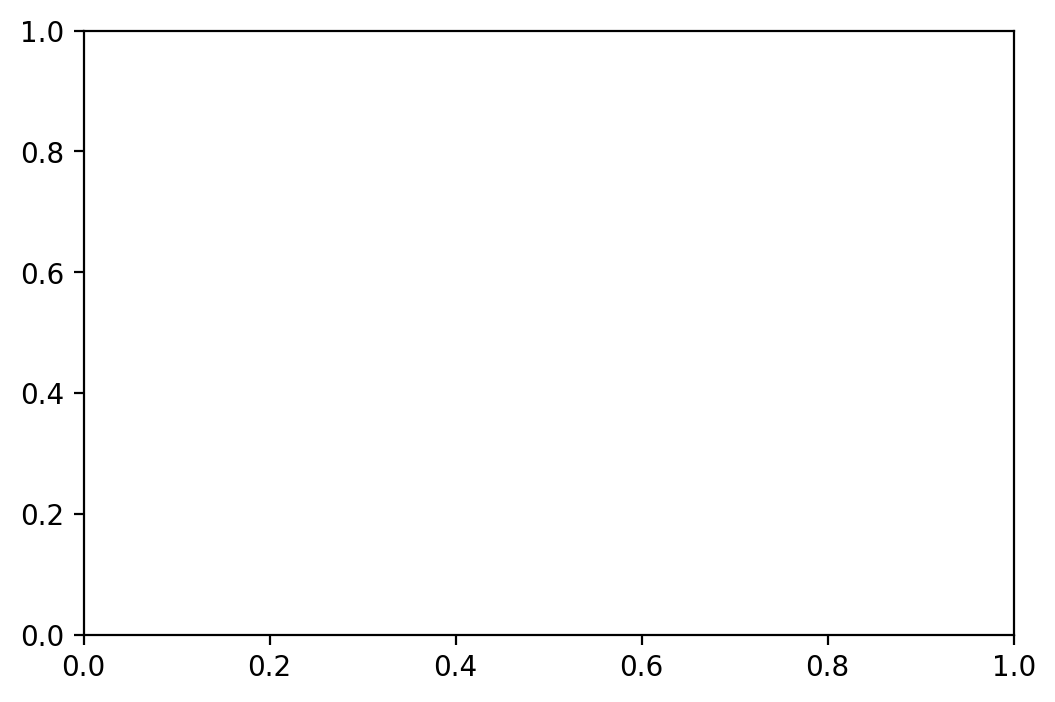

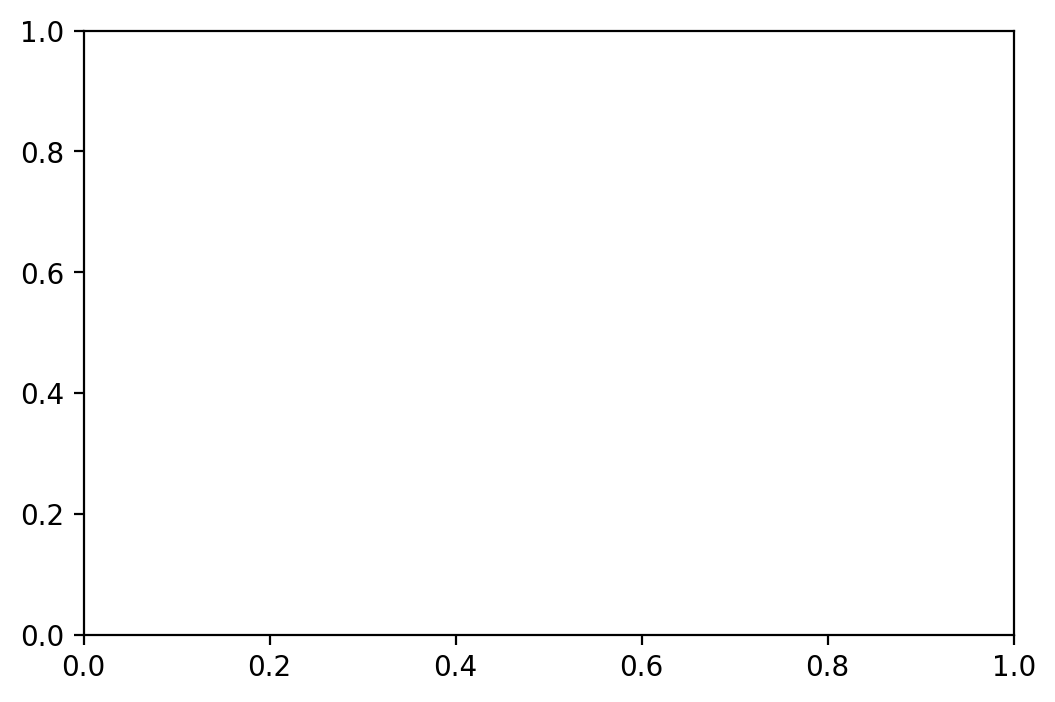

In [9]:
imgs = []

# Running
for KEY in usd_timesteps[50:]:
    try:
        fig = plt.figure(dpi=200)
        plt.hist(county_ratio_series[KEY],density=True)
        plt.title(KEY)
        plt.suptitle("Average COVID Fatality Rate (USA)")
        plt.xlabel("Deaths/Confirmed Cases")
        plt.close()
        imgs.append(create_product.plt_to_img(fig))
    except:
        pass

In [10]:
create_product.imgs_to_video(imgs,"test_video.avi",20)